### Libraries used

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as LA

### Functions and constants

In [95]:
global alpha, T, m, n, H
n = 10
H = n*n
alpha = 0
T = 0
m = 0.5

In [96]:
def utility(N):
    pho = N/H
    if(pho <= 0.5):
        res = 2*pho
    else:
        res = 2*(m-1)*pho + (2 - m)
    return res

In [97]:
def compute_gain(N_1, N_2, case):
    if(case == 'minus'):
        agent_utility = utility(N_1)
        new_agent_utility = utility(N_2 + 1)
        delta_agent_utility = new_agent_utility - agent_utility
    elif(case == 'plus'):
        agent_utility = utility(N_2)
        new_agent_utility = utility(N_1 + 1)
        delta_agent_utility = new_agent_utility - agent_utility
        
    return delta_agent_utility

In [98]:
def probability(N_1, N_2, case):
    gain = compute_gain(N_1, N_2, case)
    
    if(T == 0):
        if gain < 0:
            prob = 0
        elif gain > 0:
            prob = 1
        else:
            prob = 0.5
            
    else:
        exp = np.exp(-gain/T)
        prob = 1/(1+exp)
        
    return prob

In [99]:
def create_matrix(N):
    M = np.zeros((N+1, N+1))
    
    if N/(2*H) >= 0.5:
        i_min = N - H
        i_max = H
    else:
        i_min = 0
        i_max = N
    
    for i in range(i_min, i_max+1):
        M_i_plus  = ((N-i) * (H-i))/(H*H) * probability(i, N - i, 'plus')
        M_i_minus = (i * (H-N+i))/(H*H) * probability(i, N - i, 'minus')
        M_i_i = 1 - M_i_plus - M_i_minus
        
        if(i == i_min):
            M[i,i] = M_i_i
            M[i, i+1] = M_i_plus
        
        elif(i == i_max):
            M[i,i] = M_i_i
            M[i, i-1] = M_i_minus
            
        else:
            M[i,i] = M_i_i
            M[i, i-1] = M_i_minus
            M[i, i+1] = M_i_plus
        
    return M

In [100]:
def initial_vector(i_min, i_max, N):
    array = np.zeros(i_max - i_min + 1)
    array[N - i_min] = 1
    return array

### Analysis

This code calculates the evolution of the number of agents in a block in a 2-blocks city system treating it as a birth-death process using linear algebra.

1.0000000000001825


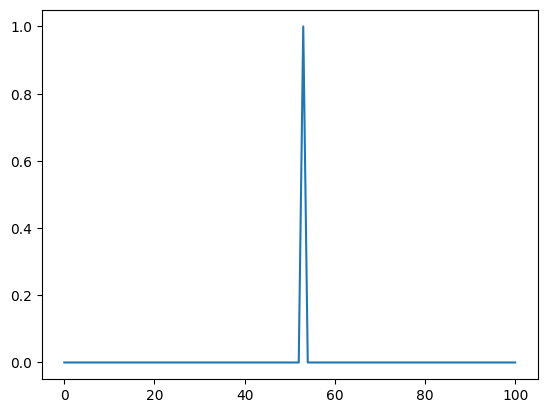

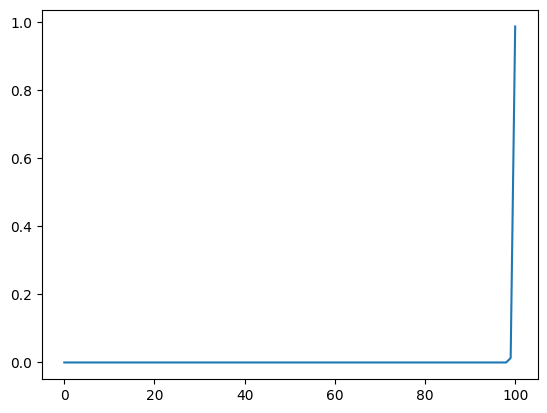

In [170]:
# number of agents
N = 100

# minimum and maximum number of agents in a block

# if total density is greater then 0.5
if N/(2*H) >= 0.5:
    i_min = N - H
    i_max = H

# if total density is less then 0.5
else:
    i_min = 0
    i_max = N

# creates the birth-death process matrix
M = create_matrix(N)
# actually we need the transpose to do the calculations
M = np.transpose(M)

"""
# being V the vector representing the probability of a block have N_t agents (between i_min and i_max) and M the matrix of the birth-death process,
# which evolves the system over time, so we want to find the vector V_equi that doesn't change when M is applied in it: M * V_equi = V_equi. So
# V_equi is the eigenvector of M with eigenvalue 1.
eigenvalues, eigenvectors = LA.eig(M, left = True, right = False)

eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real
        
eigenvectors_inverse = LA.inv(eigenvectors)

D = np.diag(eigenvalues)

# num tests how good is our calculations of the eigenvectors_inverse
num = LA.norm(np.matmul(eigenvectors, eigenvectors_inverse) - np.identity(len(eigenvalues)))
print(f"\n How good is eigenvectros_inverse (the closer to 0 the better): {num}")
"""

# P is the initial vector. It represents the initial state of our system, for example, a block with initial_number_of_agents agents.
# So it is a vector with i_max - i_min + 1 spaces (a block can have from i_min up to i_max agents) with value 0, but the
# P[initial_number_of_agents] = 1, which represents the inital condition
initial_number_of_agents = 53

P = initial_vector(i_min, i_max, initial_number_of_agents)

# direct multiplication
a = np.matmul(M,P)

steps = 50000
for i in range(steps):
    a = np.matmul(M,a)

# checks if the final state has sum 1 of all values (statistically possible)
summ = 0
for value in a:
    summ += value
print(summ)

# here we calculate the time evolution of the system, we apply the M matrix time_steps times in the P
"""
a = np.matmul(eigenvectors_inverse,P)
time_steps = 1000
D_k = np.diag(np.array([x**time_steps for x in eigenvalues]))

a = np.matmul(D_k,a)
    
a = np.matmul(eigenvectors, a)
sum = 0
for value in a:
    sum += value

print(sum)
"""
plt.figure()
plt.plot(P)
plt.show()

plt.figure()
plt.plot(a)
plt.show()